## Python statistics essential training - 02_04_cleaning

Standard imports

In [12]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
billboard = pd.read_csv('billboard.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 2: invalid start byte

In [4]:
# as you can see while loading the file we encounter a unicode deconing error
# because the file was not saved with the default python encoding, which is utf-8
# can find out the encoding with a command line utility !file
!file billboard.csv

billboard.csv: CSV text


In [7]:
# the result is text, which in python it's encoding is represented by 'latin-1'
billboard = pd.read_csv('billboard.csv', encoding='latin-1')

In [24]:
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [27]:
billboard.index

RangeIndex(start=0, stop=317, step=1)

Text(0, 0.5, 'weekly peaks')

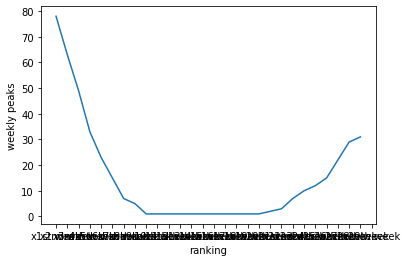

In [35]:
# we can do many things with this dataset
# for example: plot the history of a given song
plt.plot(billboard.loc[0,'x1st.week':'x76th.week'])
plt.xlabel('ranking')
plt.ylabel('weekly peaks')

Text(0, 0.5, 'weekly peaks')

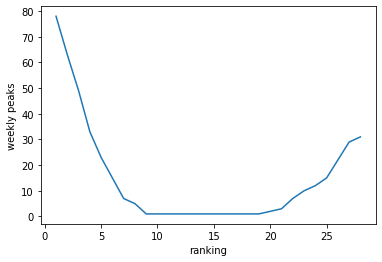

In [36]:
# as you can see the x-axis is not quite visual
# matplotlib is generally good at generating a plot based
# on the index of the pandas series
# but in this example it failed, so we would have to manually adjust it
# by specifying the range
plt.plot(range(1,77),billboard.loc[0,'x1st.week':'x76th.week'])
plt.xlabel('ranking')
plt.ylabel('weekly peaks')

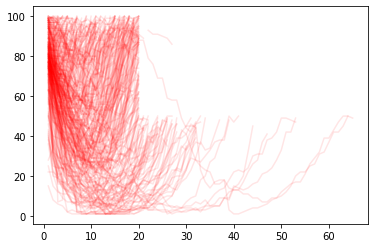

In [28]:
# plotting several songs at once
# we would need to iterate over rows to do so
# therefore we use the .iterrows() method to access the index and the contete

for index, row in billboard.iterrows():
    plt.plot(range(1,77),row['x1st.week':'x76th.week'], color='red', alpha=0.1)

In [ ]:
# a problem for this dataset is that ranking is not very useable for analysis
# as they are divided along multiple columns
# it would be more benefitial to have each ranking in a separate row, with week number as a variable
# technically this is called melting each row into multiple ones
# each of which will represent a single ranking

# for simplicity, we will shorten our dataset so we can apply melting

In [30]:
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered','x1st.week', 'x2nd.week', 'x3rd.week']]

In [31]:
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [34]:
# rename the columns
bshort.columns = ['artist', 'track', 'time', 'date.entered','wk1', 'wk2','wk3']
bshort

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0
...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN


In [50]:
# with the shorter dataset we will apply melt
# 1 parameter: identifier variables that are repeated for several rows
# 2 parameter: values or observation columns
# 3 parameter: name of the column that holds the type of observation
# 4 parameter: name of the column that holds the value of observation
bmelt = bshort.melt(['artist', 'track', 'time', 'date.entered'],['wk1', 'wk2','wk3'],'week', 'rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [46]:
# lets teast it out by selecting a specific song
# use query method
bmelt.query('artist=="Santana"')

,artist,track,time,date.entered,week,rank
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
318,Santana,"Maria, Maria",4:18,2000-02-12,2,8.0
635,Santana,"Maria, Maria",4:18,2000-02-12,3,6.0


In [51]:
# we can also change the week to a number
# use apply method, which takes a function, using lambda
bmelt['week'].apply(lambda s: int(s[2]))

0      1
1      1
2      1
3      1
4      1
      ..
946    3
947    3
948    3
949    3
950    3
Name: week, Length: 951, dtype: int64

In [52]:
bmelt['week'] =bmelt['week'].apply(lambda s: int(s[2]))
bmelt

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,3,NaN
947,"Smith, Will",Freakin' It,3:58,2000-02-12,3,99.0
948,Zombie Nation,Kernkraft 400,3:30,2000-09-02,3,NaN
949,"Eastsidaz, The",Got Beef,3:58,2000-07-01,3,NaN


In [53]:
# turn dates into proper date time objects
pd.to_datetime(bmelt['date.entered'])

0     2000-09-23
1     2000-02-12
2     1999-10-23
3     2000-08-12
4     2000-08-05
         ...    
946   2000-08-05
947   2000-02-12
948   2000-09-02
949   2000-07-01
950   2000-10-28
Name: date.entered, Length: 951, dtype: datetime64[ns]

In [54]:
bmelt['date.entered']=pd.to_datetime(bmelt['date.entered'])

In [62]:
# The timedelta object supports mathematical operations such as addition, subtraction, 
# multiplication etc. using basic operators, so it's very easy to use it. 
# It's mostly used to get a datetime object with some delta date and time.
# so we add a new column data 
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week']-1)


# we can now drop the date entered, using drop method, and specify axis 1, to indetify that it is a column

bmelt.drop(['date.entered'], axis=1, inplace=True)
bmelt

,artist,track,time,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1,71.0,1999-10-23
3,Madonna,Music,3:45,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,1,57.0,2000-08-05
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,3,NaN,2000-08-19
947,"Smith, Will",Freakin' It,3:58,3,99.0,2000-02-26
948,Zombie Nation,Kernkraft 400,3:30,3,NaN,2000-09-16
949,"Eastsidaz, The",Got Beef,3:58,3,NaN,2000-07-15


In [63]:
bmelt.query('track=="Liar"')

,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [64]:
# finaly sort both the columns and the rows
# use the sort_values method
bfinal = bmelt[['artist', 'track', 'time','date','week','rank']]
bfinal.sort_values(['artist', 'track'], inplace=True)

In [65]:
bfinal

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0
...,...,...,...,...,...,...
631,Zombie Nation,Kernkraft 400,3:30,2000-09-09,2,99.0
948,Zombie Nation,Kernkraft 400,3:30,2000-09-16,3,NaN
15,matchbox twenty,Bent,4:12,2000-04-29,1,60.0
332,matchbox twenty,Bent,4:12,2000-05-06,2,37.0


In [66]:
# as we can see we have redundancy, many repetative data
# therefore we need to normalize the data
# by creating a new table for the track and use an index to refer
# the artist
# use .drop_duplicates() method

tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()
tracks

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35
...,...,...,...
254,Yankee Grey,Another Nine Minutes,3:10
277,"Yearwood, Trisha",Real Live Woman,3:55
251,Ying Yang Twins,Whistle While You Twurk,4:19
314,Zombie Nation,Kernkraft 400,3:30


In [70]:
# as we can see the index is unique, so we need to use it as an identifying column

# we create the column id with the index data
tracks.index.name = 'id'

# so we need to reset the index now
tracksid = tracks.reset_index()
tracksid.head()
#tracks

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [72]:
# we will now perform a join between the new table tracks and billboard table
# we will use the merge method to match artist and track

pd.merge(tracksid, bfinal, on=['track','artist','time']).head()
# you will see that the id has been added for each record

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [74]:
# since we have the data stored in tracksid and bfinal,
# we can remove from display the columns we don't need
tidy = pd.merge(tracksid, bfinal, on=['track','artist','time']).drop(['track','artist','time'], axis=1)
tidy

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0
...,...,...,...,...
946,314,2000-09-09,2,99.0
947,314,2000-09-16,3,NaN
948,15,2000-04-29,1,60.0
949,15,2000-05-06,2,37.0


In [75]:
# now we can perform computations
# find the highest rank of a song
tidy[tidy.week==1]['rank'].idxmin()
# The idxmin() function is used to get the row label of the minimum value. 
# If multiple values equal the minimum, the first row label with that value is returned.

756

In [77]:
# we can look what that song was
tidy.loc[tidy[tidy.week==1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                     15
Name: 756, dtype: object

In [78]:
tracksid.query('id==1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18
